In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
data = pd.read_csv('book.csv',encoding='latin1')
data.head()

,S.No,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   S.No         10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [4]:
#Drop first column
data = data.drop('S.No' , axis = 1)
data.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [5]:
#Rename the column index
data = data.rename({'User.ID':'user_id' , 'Book.Title':'book_title' , 'Book.Rating':'book_rating'} , axis =1)
data.head()

,user_id,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [6]:
#Shape of the data
data.shape

(10000, 3)

In [7]:
# shorting the data 
data.sort_values('user_id')

,user_id,book_title,book_rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


In [8]:
book_rated = data['user_id'].value_counts()
book_rated

3757      523
162052    214
2276      212
4017      156
277427    150
         ... 
969         1
967         1
965         1
951         1
162129      1
Name: user_id, Length: 2182, dtype: int64

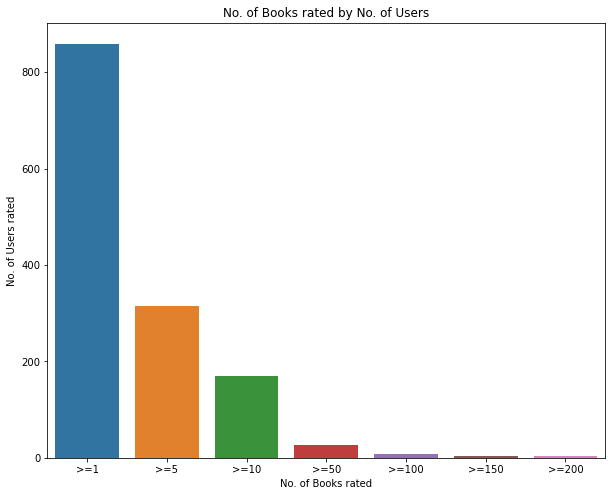

In [9]:
rated_books = [1 , 5 , 10 , 50 , 100 , 150 , 200]
no_users = []
for rat in rated_books:
    x = (book_rated.values >rat).sum()
    no_users.append(x)
    
dt = {'rated_books' : ['>=1' , '>=5' , '>=10' , '>=50' , '>=100' , '>=150' , '>=200'] , 'no_users':no_users}
n_book_n_user = pd.DataFrame(dt)
plt.figure(figsize = (10,8))
sns.barplot(x='rated_books' , y = 'no_users' , data = n_book_n_user)
plt.title('No. of Books rated by No. of Users')
plt.xlabel('No. of Books rated')
plt.ylabel('No. of Users rated')
plt.show()

In [10]:
len(data['user_id'].unique())

2182

In [11]:
len(data['book_title'].unique())

9659

In [12]:
data['book_rating'].value_counts().sort_index()

1       43
2       63
3      146
4      237
5     1007
6      920
7     2076
8     2283
9     1493
10    1732
Name: book_rating, dtype: int64

In [13]:
rating_books = data['book_rating'].value_counts().sort_index()
rating_books = list(rating_books.index)
# rating_books
no_users_rated = data['book_rating'].value_counts().sort_index()
no_users_rated = list(no_users_rated.values)
# no_users_rated

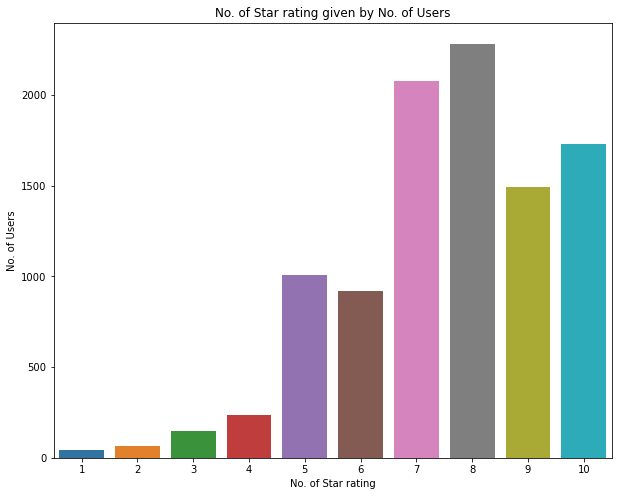

In [14]:
dt = {'rating_of_books' : rating_books , 'no_users':no_users_rated}
n_book_n_user = pd.DataFrame(dt)
plt.figure(figsize = (10,8))
sns.barplot(x='rating_of_books' , y = 'no_users' , data = n_book_n_user)
plt.title('No. of Star rating given by No. of Users')
plt.xlabel('No. of Star rating')
plt.ylabel('No. of Users')
plt.show()

In [15]:
data['book_title'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: book_title, Length: 9659, dtype: int64

## Recommendation Engine


In [16]:
# Creating pivot table
user_df = data.pivot_table(index='user_id', columns='book_title', values='book_rating').reset_index()
user_df

book_title,user_id,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,278852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#replace NaNs with 0 values
user_df.fillna(0, inplace=True)
user_df.head()

book_title,user_id,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [19]:
user_sim = 1 - pairwise_distances( user_df.values , metric='cosine')
user_sim

array([[1.        , 0.39429125, 0.40634798, ..., 0.4738791 , 0.4738791 ,
        0.4738791 ],
       [0.39429125, 1.        , 0.71347724, ..., 0.83205029, 0.83205029,
        0.83205029],
       [0.40634798, 0.71347724, 1.        , ..., 0.85749292, 0.85749293,
        0.85749292],
       ...,
       [0.4738791 , 0.83205029, 0.85749292, ..., 1.        , 1.        ,
        0.99999999],
       [0.4738791 , 0.83205029, 0.85749293, ..., 1.        , 1.        ,
        1.        ],
       [0.4738791 , 0.83205029, 0.85749292, ..., 0.99999999, 1.        ,
        1.        ]])

In [20]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim , index =user_df['user_id'] , columns = user_df['user_id'] )
user_sim_df

user_id,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
user_id,,,,,,,,,,,,,,,,,,,,,
8,1.000000,0.394291,0.406348,0.364044,0.395067,0.413021,0.398829,0.444661,0.451572,0.420872,...,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879
9,0.394291,1.000000,0.713477,0.639199,0.693670,0.725195,0.700275,0.780749,0.792882,0.738980,...,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050
10,0.406348,0.713477,1.000000,0.658744,0.714881,0.747370,0.721688,0.804623,0.817127,0.761576,...,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493
12,0.364044,0.639199,0.658744,1.000000,0.640457,0.669563,0.646555,0.720855,0.732058,0.682290,...,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221
14,0.395067,0.693670,0.714881,0.640457,1.000000,0.726622,0.701653,0.782285,0.794443,0.740434,...,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
278849,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
278851,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
user_sim_df.iloc[0:5, 0:5]

user_id,8,9,10,12,14
user_id,,,,,
8,1.000000,0.394291,0.406348,0.364044,0.395067
9,0.394291,1.000000,0.713477,0.639199,0.693670
10,0.406348,0.713477,1.000000,0.658744,0.714881
12,0.364044,0.639199,0.658744,1.000000,0.640457
14,0.395067,0.693670,0.714881,0.640457,1.000000


In [22]:
# Replace digonal vlues with 0
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

user_id,8,9,10,12,14
user_id,,,,,
8,0.000000,0.394291,0.406348,0.364044,0.395067
9,0.394291,0.000000,0.713477,0.639199,0.693670
10,0.406348,0.713477,0.000000,0.658744,0.714881
12,0.364044,0.639199,0.658744,0.000000,0.640457
14,0.395067,0.693670,0.714881,0.640457,0.000000


In [23]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:10]

user_id
8     278755
9     278755
10    278755
12    278755
14    278755
16    278755
17    278755
19    278418
22    278755
26    278755
dtype: int64

In [24]:
# Compareing users
data[(data['user_id']==8) | (data['user_id']==278755)]

,user_id,book_title,book_rating
2320,278755,"The Elements of Style, Fourth Edition",1
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5
2402,8,Truckers,5
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2405,8,The Art Of Celtia,7


In [25]:
user_8 = data[data['user_id']==8]
user_8

,user_id,book_title,book_rating
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5
2402,8,Truckers,5
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2405,8,The Art Of Celtia,7


In [26]:
user_278755 = data[data['user_id']==278755]
user_278755

,user_id,book_title,book_rating
2320,278755,"The Elements of Style, Fourth Edition",1


In [27]:
user_8['book_title']

2399                              Ancient Celtic Romances
2400    The Western way: A practical guide to the West...
2401                                                Wings
2402                                             Truckers
2403                  Keepers of the Earth Teachers Guide
2404                              The Celts Activity Book
2405                                    The Art Of Celtia
Name: book_title, dtype: object

In [28]:
user_278755['book_title']

2320    The Elements of Style, Fourth Edition
Name: book_title, dtype: object

In [29]:
pd.merge(user_8,user_278755,on='book_title',how='outer')

,user_id_x,book_title,book_rating_x,user_id_y,book_rating_y
0,8.0,Ancient Celtic Romances,5.0,NaN,NaN
1,8.0,The Western way: A practical guide to the West...,5.0,NaN,NaN
2,8.0,Wings,5.0,NaN,NaN
3,8.0,Truckers,5.0,NaN,NaN
4,8.0,Keepers of the Earth Teachers Guide,6.0,NaN,NaN
5,8.0,The Celts Activity Book,6.0,NaN,NaN
6,8.0,The Art Of Celtia,7.0,NaN,NaN
7,NaN,"The Elements of Style, Fourth Edition",NaN,278755.0,1.0


+ we can recommend the list of books to user 278755 he has not read yet from above table

+ That we can do for all similar users and recommend different book to them